<h1><center>Analisis Penggunaan Random Forest Regressor untuk Prediksi Harga Properti di Kebayoran Baru</center></h1>
<p><center><b>Adhelio Reyhandro (00000059870), Aura Lintang Pembayun Pinasti Aji (00000061031),Fritz Filemon Siregar (00000060211), Sultan Adyatma Rangga Setiawan (00000061918)
</b><center>
<p><center>Information System, Universitas Multimedia Nusantara, Tangerang, Indonesia<center>
<p><center>adhelio.reyhandro@student.umn.ac.id, aura.lintang@student.umn.ac.id, fritz.filemon@student.umn.ac.id, sultan.adyatma@student.umn.ac.id<center>

___
## Essentials

### Mengabaikan Warning

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Import Libraries

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle

___
## Pemahaman Bisnis (Business Understanding)

Penelitian ini membutuhkan informasi tentang pasar properti yang ada di Kebayoran Baru. Dibutuhkan berbagai atribut atau faktor yang yang mempengaruhi harga properti di daerah tersebut. Dengan analisis menggunakan algoritma Random Forest Regressor, jurnal ini akan menyediakan pemahaman yang lebih baik tentang harga properti di Kebayoran Baru.

___
## Pemahaman Data (Data Understanding)

### Memasukkan dataset sebagai panda dataframe

In [4]:
# data = pd.read_csv('/content/drive/MyDrive/UAS - DATA MODELLING/processed_data.csv')
data = pd.read_csv('processed_data.csv')
data[:5]

,price,buildingSize,landSize,bedRooms,bathRooms,garages,z,province,city,district,latitude,longitude
0,850000000,100,50,3.0,2,0,1.324517,Jawa Timur,Surabaya,Tambaksari,NaN,NaN
1,1700000000,110,103,3.0,2,0,0.586065,Banten,Tangerang Selatan,NaN,NaN,NaN
2,3500000000,201,113,3.0,4,1,0.929438,Jakarta,Jakarta Timur,Matraman,NaN,NaN
3,38000000000,600,1028,5.0,4,4,2.932825,Jakarta,Jakarta Pusat,Kemayoran,NaN,NaN
4,1800000000,150,180,3.0,2,0,0.586065,Jawa Timur,Sidoarjo,Sidoarjo,NaN,NaN


### Eksplorisasi dataframe

In [5]:
print("Dataset Shape:",data.shape)

Dataset Shape: (594707, 12)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594707 entries, 0 to 594706
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         594707 non-null  int64  
 1   buildingSize  594707 non-null  int64  
 2   landSize      594707 non-null  int64  
 3   bedRooms      594707 non-null  float64
 4   bathRooms     594707 non-null  int64  
 5   garages       594707 non-null  int64  
 6   z             594707 non-null  float64
 7   province      594707 non-null  object 
 8   city          587538 non-null  object 
 9   district      364531 non-null  object 
 10  latitude      495405 non-null  float64
 11  longitude     495342 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 54.4+ MB


In [7]:
data.describe()

,price,buildingSize,landSize,bedRooms,bathRooms,garages,z,latitude,longitude
count,5.947070e+05,5.947070e+05,5.947070e+05,594707.000000,594707.000000,594707.000000,594707.000000,495405.000000,495342.000000
mean,2.376457e+13,2.975777e+04,2.599814e+04,3.660246,2.762362,0.498212,1.382386,-6.543112,108.309177
std,1.195133e+16,9.767158e+06,8.537606e+06,3.869035,3.126942,1.192775,0.881160,1.327792,2.762366
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.586065,-8.929291,95.097430
25%,8.000000e+08,7.200000e+01,8.500000e+01,2.000000,2.000000,0.000000,0.871157,-7.009755,106.780570
50%,1.800000e+09,1.400000e+02,1.300000e+02,3.000000,2.000000,0.000000,1.166187,-6.340836,106.944917
75%,4.000000e+09,2.500000e+02,2.380000e+02,4.000000,3.000000,1.000000,1.705531,-6.235060,110.336839
max,9.000000e+18,4.294967e+09,4.294967e+09,550.000000,127.000000,215.000000,20.798092,5.680050,140.717000


### Verifikasi kualitas dataset

#### Missing values

In [8]:
print(data.isnull().sum())
print("\nNaN Total      ",data.isnull().sum().sum())

price                0
buildingSize         0
landSize             0
bedRooms             0
bathRooms            0
garages              0
z                    0
province             0
city              7169
district        230176
latitude         99302
longitude        99365
dtype: int64

NaN Total       436012


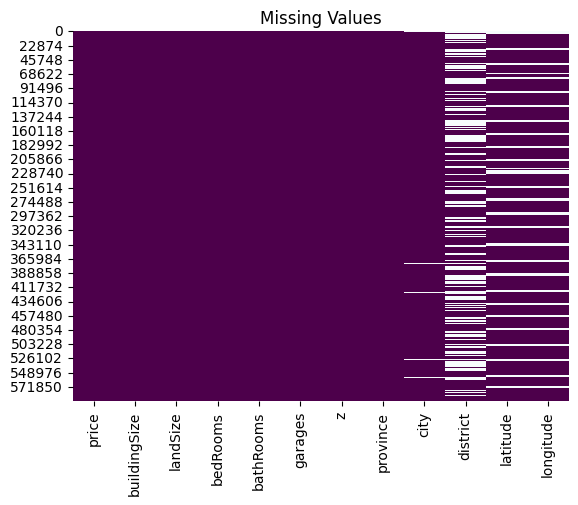

In [9]:
sns.heatmap(data.isnull(), cbar=False, cmap="BuPu_r")
plt.title('Missing Values')
plt.show()

#### Outliers

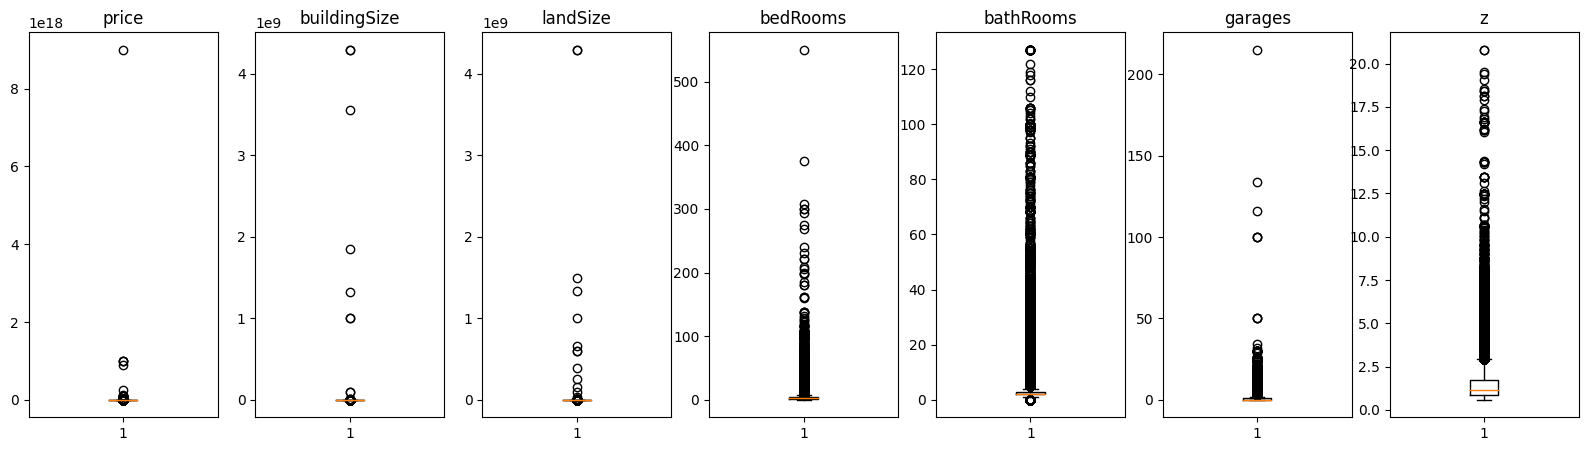

In [10]:
fig, axs = plt.subplots(1, 7, figsize=(20, 5))

axs[0].boxplot(data['price'])
axs[0].set_title('price')
axs[1].boxplot(data['buildingSize'])
axs[1].set_title('buildingSize')
axs[2].boxplot(data['landSize'])
axs[2].set_title('landSize')
axs[3].boxplot(data['bedRooms'])
axs[3].set_title('bedRooms')
axs[4].boxplot(data['bathRooms'])
axs[4].set_title('bathRooms')
axs[5].boxplot(data['garages'])
axs[5].set_title('garages')
axs[6].boxplot(data['z'])
axs[6].set_title('z')

plt.show()

___
## Praproses Data (Data Preprocessing)

### Mengganti nama atribut

In [11]:
data.rename(columns = {'z' : 'landHeight'}, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594707 entries, 0 to 594706
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         594707 non-null  int64  
 1   buildingSize  594707 non-null  int64  
 2   landSize      594707 non-null  int64  
 3   bedRooms      594707 non-null  float64
 4   bathRooms     594707 non-null  int64  
 5   garages       594707 non-null  int64  
 6   landHeight    594707 non-null  float64
 7   province      594707 non-null  object 
 8   city          587538 non-null  object 
 9   district      364531 non-null  object 
 10  latitude      495405 non-null  float64
 11  longitude     495342 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 54.4+ MB


### Menghapus missing values

In [12]:
data = data.dropna()
print("\nNaN Total    : ",data.isnull().sum().sum())
print("Dataset Shape:",data.shape)


NaN Total    :  0
Dataset Shape: (315007, 12)


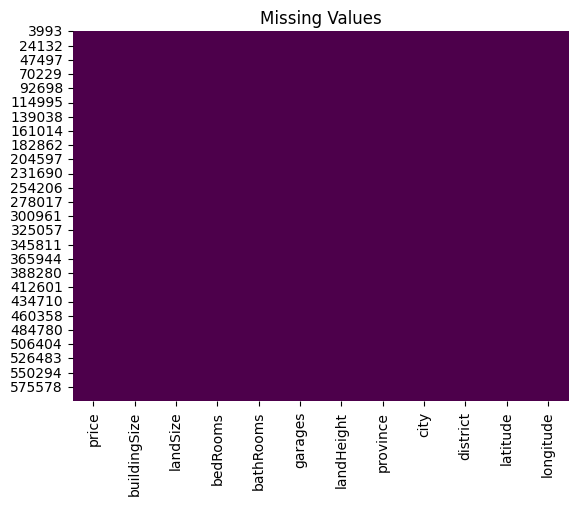

In [13]:
sns.heatmap(data.isnull(), cbar=False, cmap="BuPu_r")
plt.title('Missing Values')
plt.show()

### Memilih hanya data Kebayoran Baru

In [14]:
df = data[data['district'].str.contains('Kebayoran Baru')].reset_index()
df = df.drop(['index'],axis=1)
df[:5]

,price,buildingSize,landSize,bedRooms,bathRooms,garages,landHeight,province,city,district,latitude,longitude
0,32000000000,1000,799,8.0,7,2,2.268294,Jakarta,Jakarta Selatan,Kebayoran Baru,-6.237892,106.786870
1,10500000000,300,240,4.0,4,3,2.444942,Jakarta,Jakarta Selatan,Kebayoran Baru,-6.243622,106.800140
2,40000000000,760,720,4.0,4,0,2.447962,Jakarta,Jakarta Selatan,Kebayoran Baru,-6.245683,106.808950
3,13671000000,160,441,3.0,2,1,1.583533,Jakarta,Jakarta Selatan,Kebayoran Baru,-6.248941,106.792190
4,30000000000,700,400,5.0,3,2,2.216330,Jakarta,Jakarta Selatan,Kebayoran Baru,-6.231493,106.793092


In [15]:
print("Dataset Shape:",df.shape)

Dataset Shape: (3701, 12)


### Menghapus atribut yang tidak diperlukan

In [16]:
df = df.reset_index()

df = df.drop(['province', 'city', 'district', 'latitude', 'longitude'], axis=1)

df = df.drop(['index'], axis=1)

df[:3]

,price,buildingSize,landSize,bedRooms,bathRooms,garages,landHeight
0,32000000000,1000,799,8.0,7,2,2.268294
1,10500000000,300,240,4.0,4,3,2.444942
2,40000000000,760,720,4.0,4,0,2.447962


### Menghapus outliers dengan metode IQR

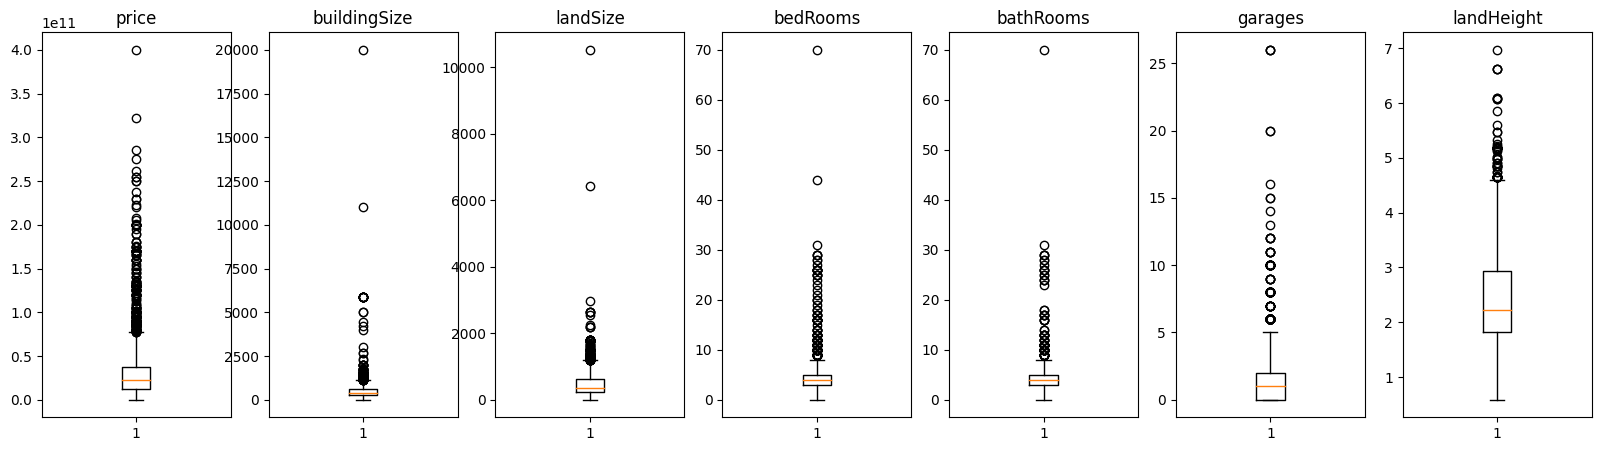

In [17]:
fig, axs = plt.subplots(1, 7, figsize=(20, 5))

axs[0].boxplot(df['price'])
axs[0].set_title('price')
axs[1].boxplot(df['buildingSize'])
axs[1].set_title('buildingSize')
axs[2].boxplot(df['landSize'])
axs[2].set_title('landSize')
axs[3].boxplot(df['bedRooms'])
axs[3].set_title('bedRooms')
axs[4].boxplot(df['bathRooms'])
axs[4].set_title('bathRooms')
axs[5].boxplot(df['garages'])
axs[5].set_title('garages')
axs[6].boxplot(df['landHeight'])
axs[6].set_title('landHeight')

plt.show()

In [18]:
for i in df.columns:

    Q1 = df[i].quantile(q = .25)
    Q3 = df[i].quantile(q = .75)

    IQR = Q3 - Q1

    df[i] = df[i][-((df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR)))]

df = df.dropna()

print("Dataset Shape:",df.shape)

Dataset Shape: (3045, 7)


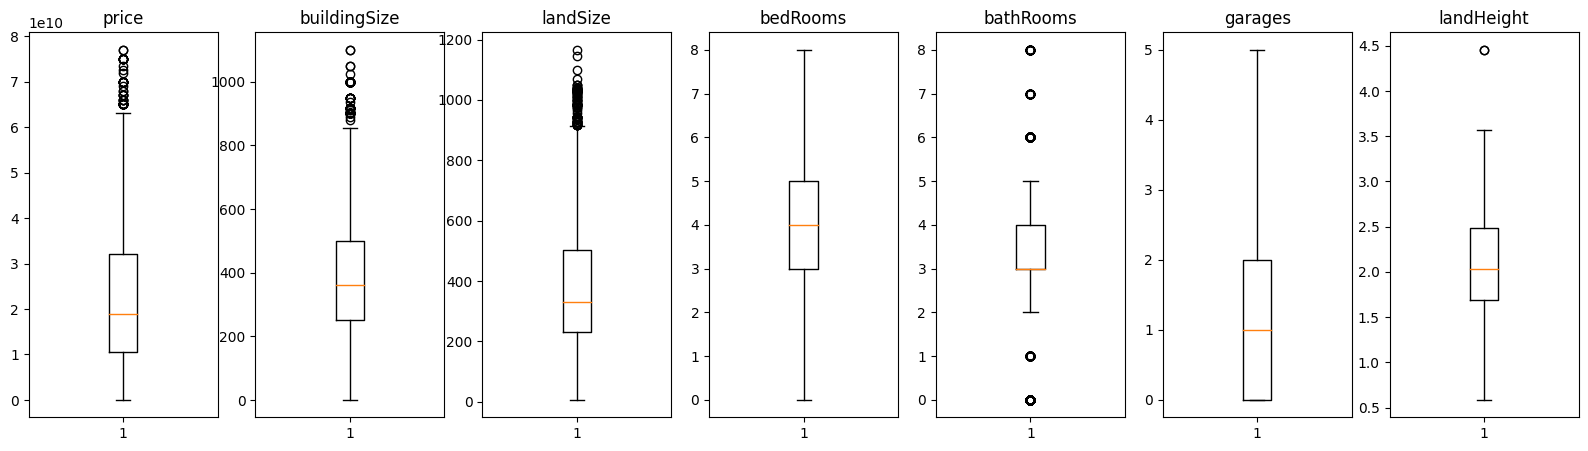

In [19]:
fig, axs = plt.subplots(1, 7, figsize=(20, 5))

axs[0].boxplot(df['price'])
axs[0].set_title('price')
axs[1].boxplot(df['buildingSize'])
axs[1].set_title('buildingSize')
axs[2].boxplot(df['landSize'])
axs[2].set_title('landSize')
axs[3].boxplot(df['bedRooms'])
axs[3].set_title('bedRooms')
axs[4].boxplot(df['bathRooms'])
axs[4].set_title('bathRooms')
axs[5].boxplot(df['garages'])
axs[5].set_title('garages')
axs[6].boxplot(df['landHeight'])
axs[6].set_title('landHeight')
plt.show()

### Merubah values dataframe dengan skala Min-Max

In [20]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [21]:
def scale_MMS(df):
    
    df[df.columns] = scaler.transform(df)
    
    return df

In [22]:
df = scale_MMS(df)
df[:3]

,price,buildingSize,landSize,bedRooms,bathRooms,garages,landHeight
0,0.415296,0.909008,0.683348,1.0,0.875,0.4,0.434753
1,0.135937,0.272066,0.201035,0.5,0.500,0.6,0.480406
2,0.519243,0.690628,0.615186,0.5,0.500,0.0,0.481186


___
## Pemodelan (Modelling)

### Splitting dataframe menjadi train set dan test set

In [23]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

print("train set :", train.shape)
print("test set  :", test.shape)

train set : (2438, 7)
test set  : (607, 7)


### Splitting train dan test set berdasarkan x dan y

In [24]:
x_train = train[['buildingSize','landSize','bedRooms','bathRooms','garages','landHeight']]
y_train = train[['price']]

x_test = test[['buildingSize','landSize','bedRooms','bathRooms','garages','landHeight']]
y_test = test[['price']]

print("x_train set :", x_train.shape)
print("x_test set  :", x_test.shape)
print("y_train set :", y_train.shape)
print("y_test set  :", y_test.shape)

x_train set : (2438, 6)
x_test set  : (607, 6)
y_train set : (2438, 1)
y_test set  : (607, 1)


### Pelatihan model dengan algoritma Random Forest Regressor

In [25]:
rfr = RandomForestRegressor(random_state=0)

rfr.fit(x_train, y_train)  
y_pred = rfr.predict(x_test)

### Melihat skor R2, MAE, MSE, RMSE, serta akurasi prediksi model dengan train set dan test set

In [26]:
print('\033[0mR2 Score : \033[1m%.3f'% r2_score(y_test, y_pred))
print('\033[0mMAE      : \033[1m%.2f'% mean_absolute_error(y_test, y_pred))
print('\033[0mMSE      : \033[1m%.2f'% mean_squared_error(y_test, y_pred))
print('\033[0mRMSE     : \033[1m%.2f'% np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score : 0.930
MAE      : 0.02
MSE      : 0.00
RMSE     : 0.06


In [27]:
print('\033[0mAccuracy on train set : \033[1m{:.3f}'.format(rfr.score(x_train, y_train)))
print('\033[0mAccuracy on test set  : \033[1m{:.3f}'.format(rfr.score(x_test, y_test)))

Accuracy on train set : 0.989
Accuracy on test set  : 0.930


___
## Evaluasi (Evaluation)

### Evaluasi terhadap model sebelum pruning

#### Print perbandingan nilai aktual dengan nilai prediksi

In [28]:
eval_pred = y_test.copy()
eval_pred['predicted'] = y_pred
eval_pred[:5]

,price,predicted
2,0.519243,0.518983
8,0.584210,0.584210
15,0.870066,0.864738
19,0.239885,0.220135
20,0.181414,0.203281


#### Plotting salah satu pohon estimator

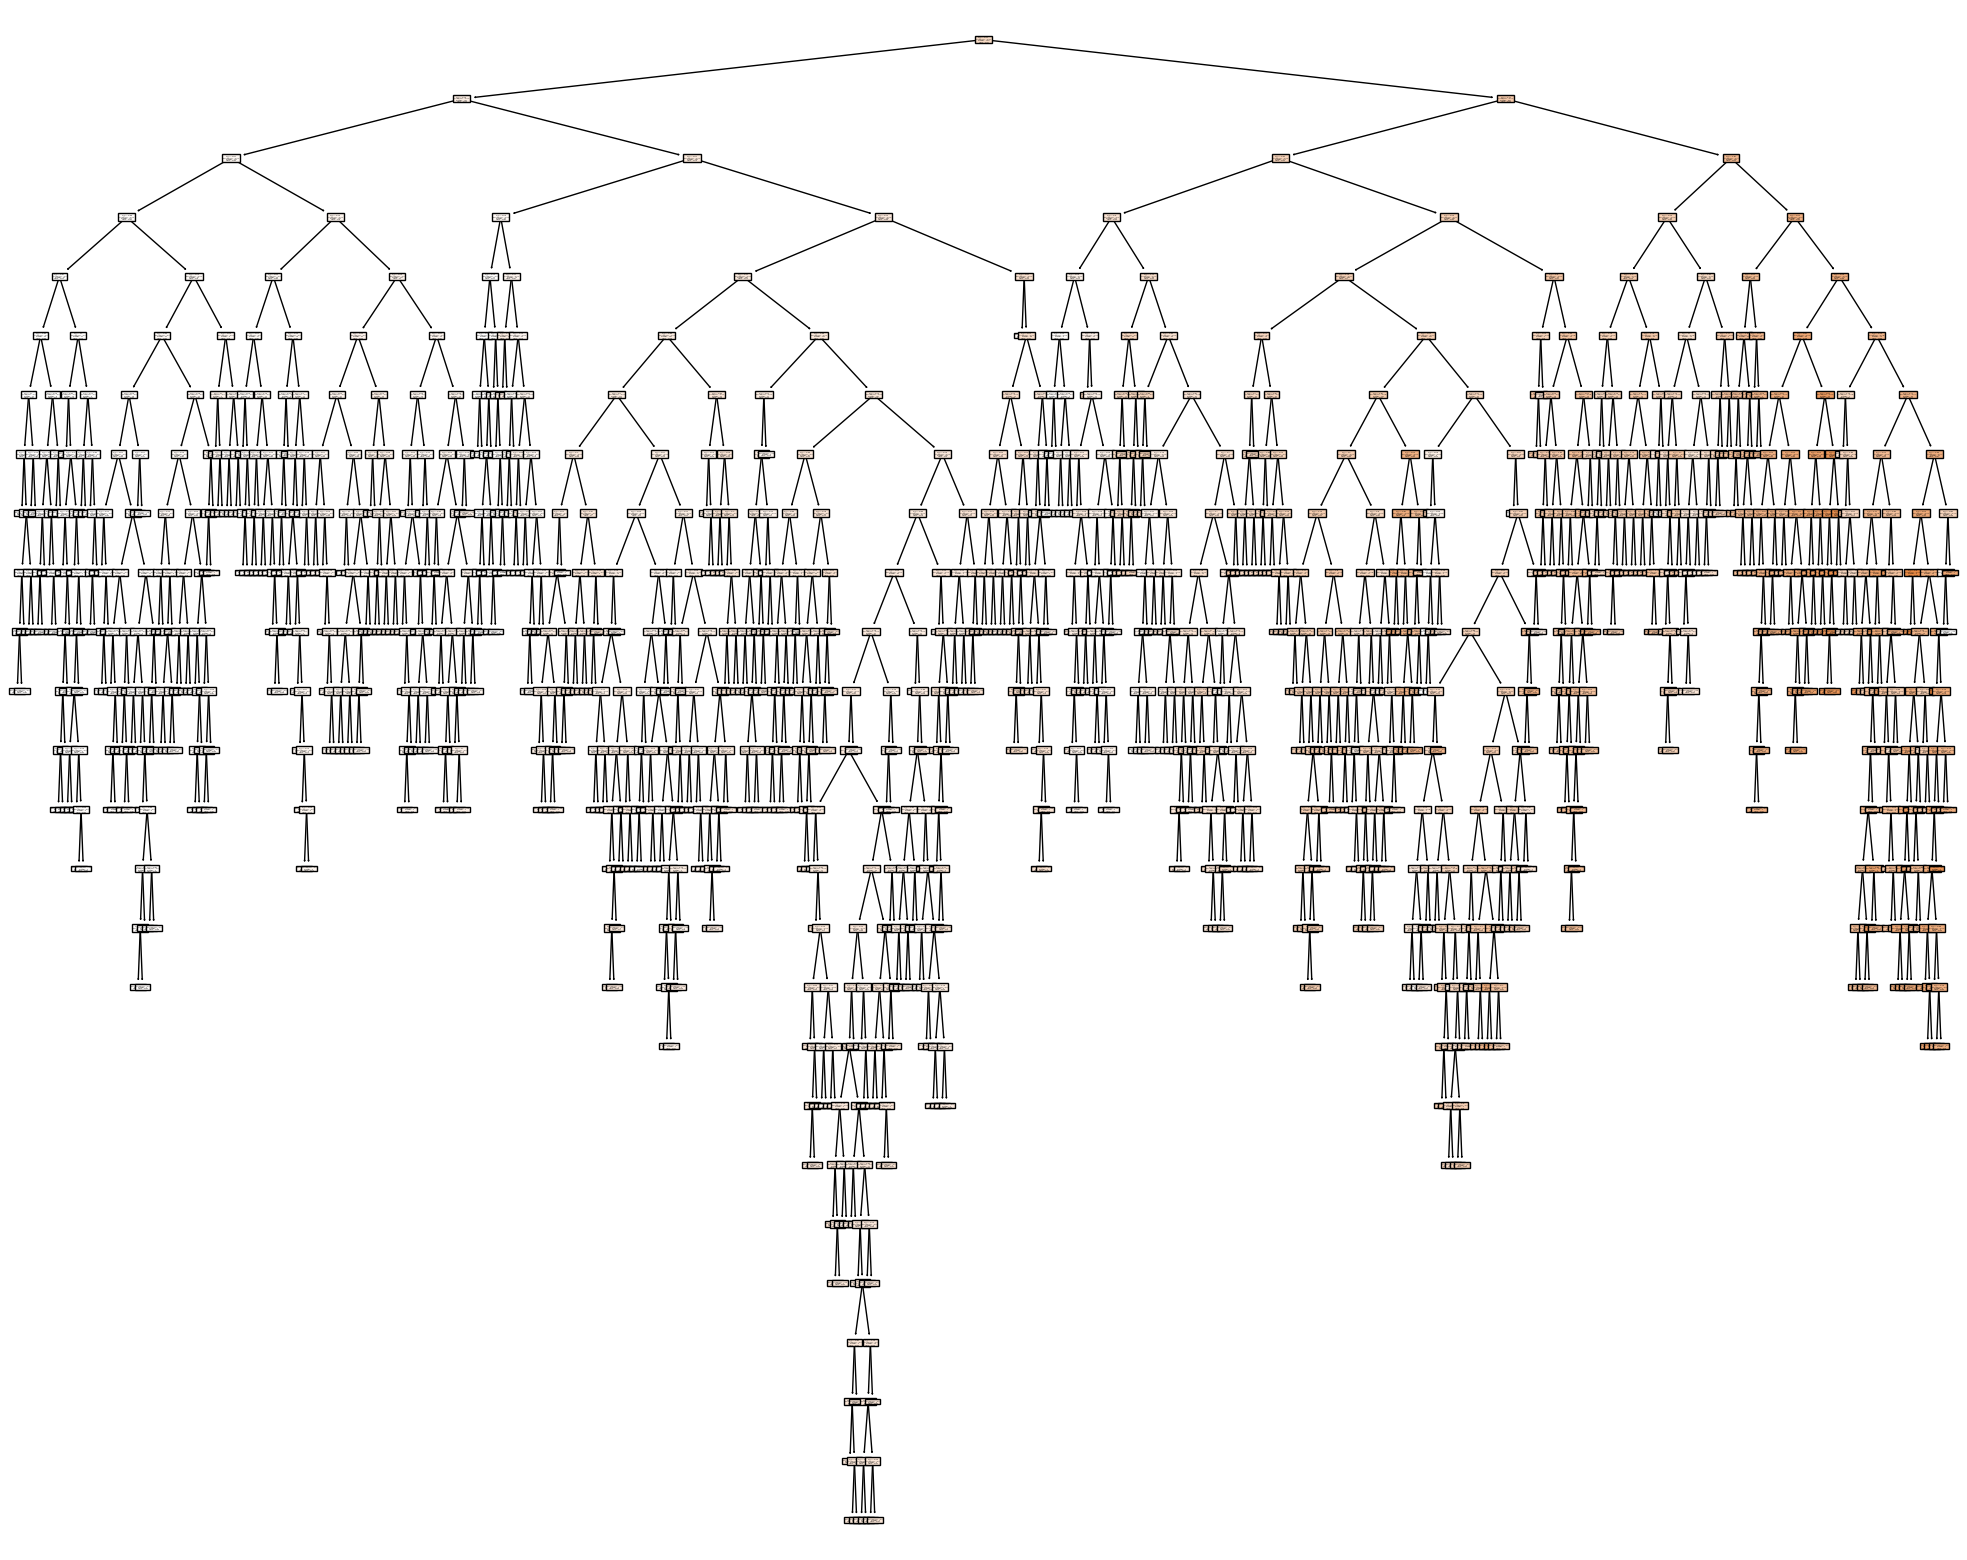

In [29]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(rfr.estimators_[0],filled=True)
plt.show()

### Post Pruning

#### Grid Search terhadap parameter terbaik

In [30]:
import time
start_time = time.time()

param_grid = {
    'criterion': ['squared_error', 'friedman_mse'],
    'n_estimators': [100, 150, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [50, 100, 150],
    'random_state':[0]
}

rfr_s = RandomForestRegressor()
rfr_s.fit(x_train, y_train)

grid_search = GridSearchCV(estimator=rfr_s, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
cv_results = grid_search.cv_results_

end_time = time.time()
elapsed_time = end_time - start_time

seconds = elapsed_time % 60
minutes = (elapsed_time // 60) % 60
hours = elapsed_time // 3600

print(f"Elapsed Time: {hours:.0f} hours, {minutes:.0f} minutes, {seconds:.2f} seconds")

Elapsed Time: 0 hours, 2 minutes, 9.68 seconds


#### Print ranking parameter model

In [31]:
scores = cv_results['mean_test_score']

results_df = pd.DataFrame(cv_results['params'])
results_df['Score'] = scores

results_df = results_df.sort_values(by='Score', ascending=False).reset_index(drop=True)

results_df['Rank'] = results_df.index + 1

In [32]:
para_frame = results_df[['Rank'] + list(results_df.columns[:-1])]
para_frame[:5]

,Rank,criterion,max_depth,min_samples_split,n_estimators,random_state,Score
0,1,friedman_mse,8,50,100,0,0.896314
1,2,squared_error,8,50,100,0,0.896276
2,3,friedman_mse,8,50,150,0,0.896249
3,4,squared_error,8,50,150,0,0.896219
4,5,friedman_mse,8,50,200,0,0.896046


### Pemodelan kembali dengan parameter terbaik

In [33]:
rfr_p = RandomForestRegressor(**best_params)

rfr_p.fit(x_train, y_train)
y_pred_p = rfr_p.predict(x_test)

#### Melihat skor R2, MAE, MSE, RMSE, serta akurasi prediksi model parameter terbaik dengan train set dan test set

In [34]:
print('\033[0mR2 Score : \033[1m%.3f'% r2_score(y_test, y_pred_p))
print('\033[0mMAE      : \033[1m%.2f'% mean_absolute_error(y_test, y_pred_p))
print('\033[0mMSE      : \033[1m%.2f'% mean_squared_error(y_test, y_pred_p))
print('\033[0mRMSE     : \033[1m%.2f'% np.sqrt(mean_squared_error(y_test, y_pred_p)))

R2 Score : 0.902
MAE      : 0.03
MSE      : 0.00
RMSE     : 0.07


In [35]:
print('\033[0mAccuracy on train set : \033[1m{:.3f}'.format(rfr_p.score(x_train, y_train)))
print('\033[0mAccuracy on test set  : \033[1m{:.3f}'.format(rfr_p.score(x_test, y_test)))

Accuracy on train set : 0.920
Accuracy on test set  : 0.902


#### Print perbandingan nilai aktual dengan nilai prediksi terbaru

In [36]:
eval_pred_p = y_test.copy()
eval_pred_p['predicted'] = y_pred_p
eval_pred_p[:5]

,price,predicted
2,0.519243,0.493328
8,0.584210,0.579944
15,0.870066,0.846247
19,0.239885,0.199467
20,0.181414,0.167641


#### Plotting salah satu pohon estimator model dengan parameter terbaik

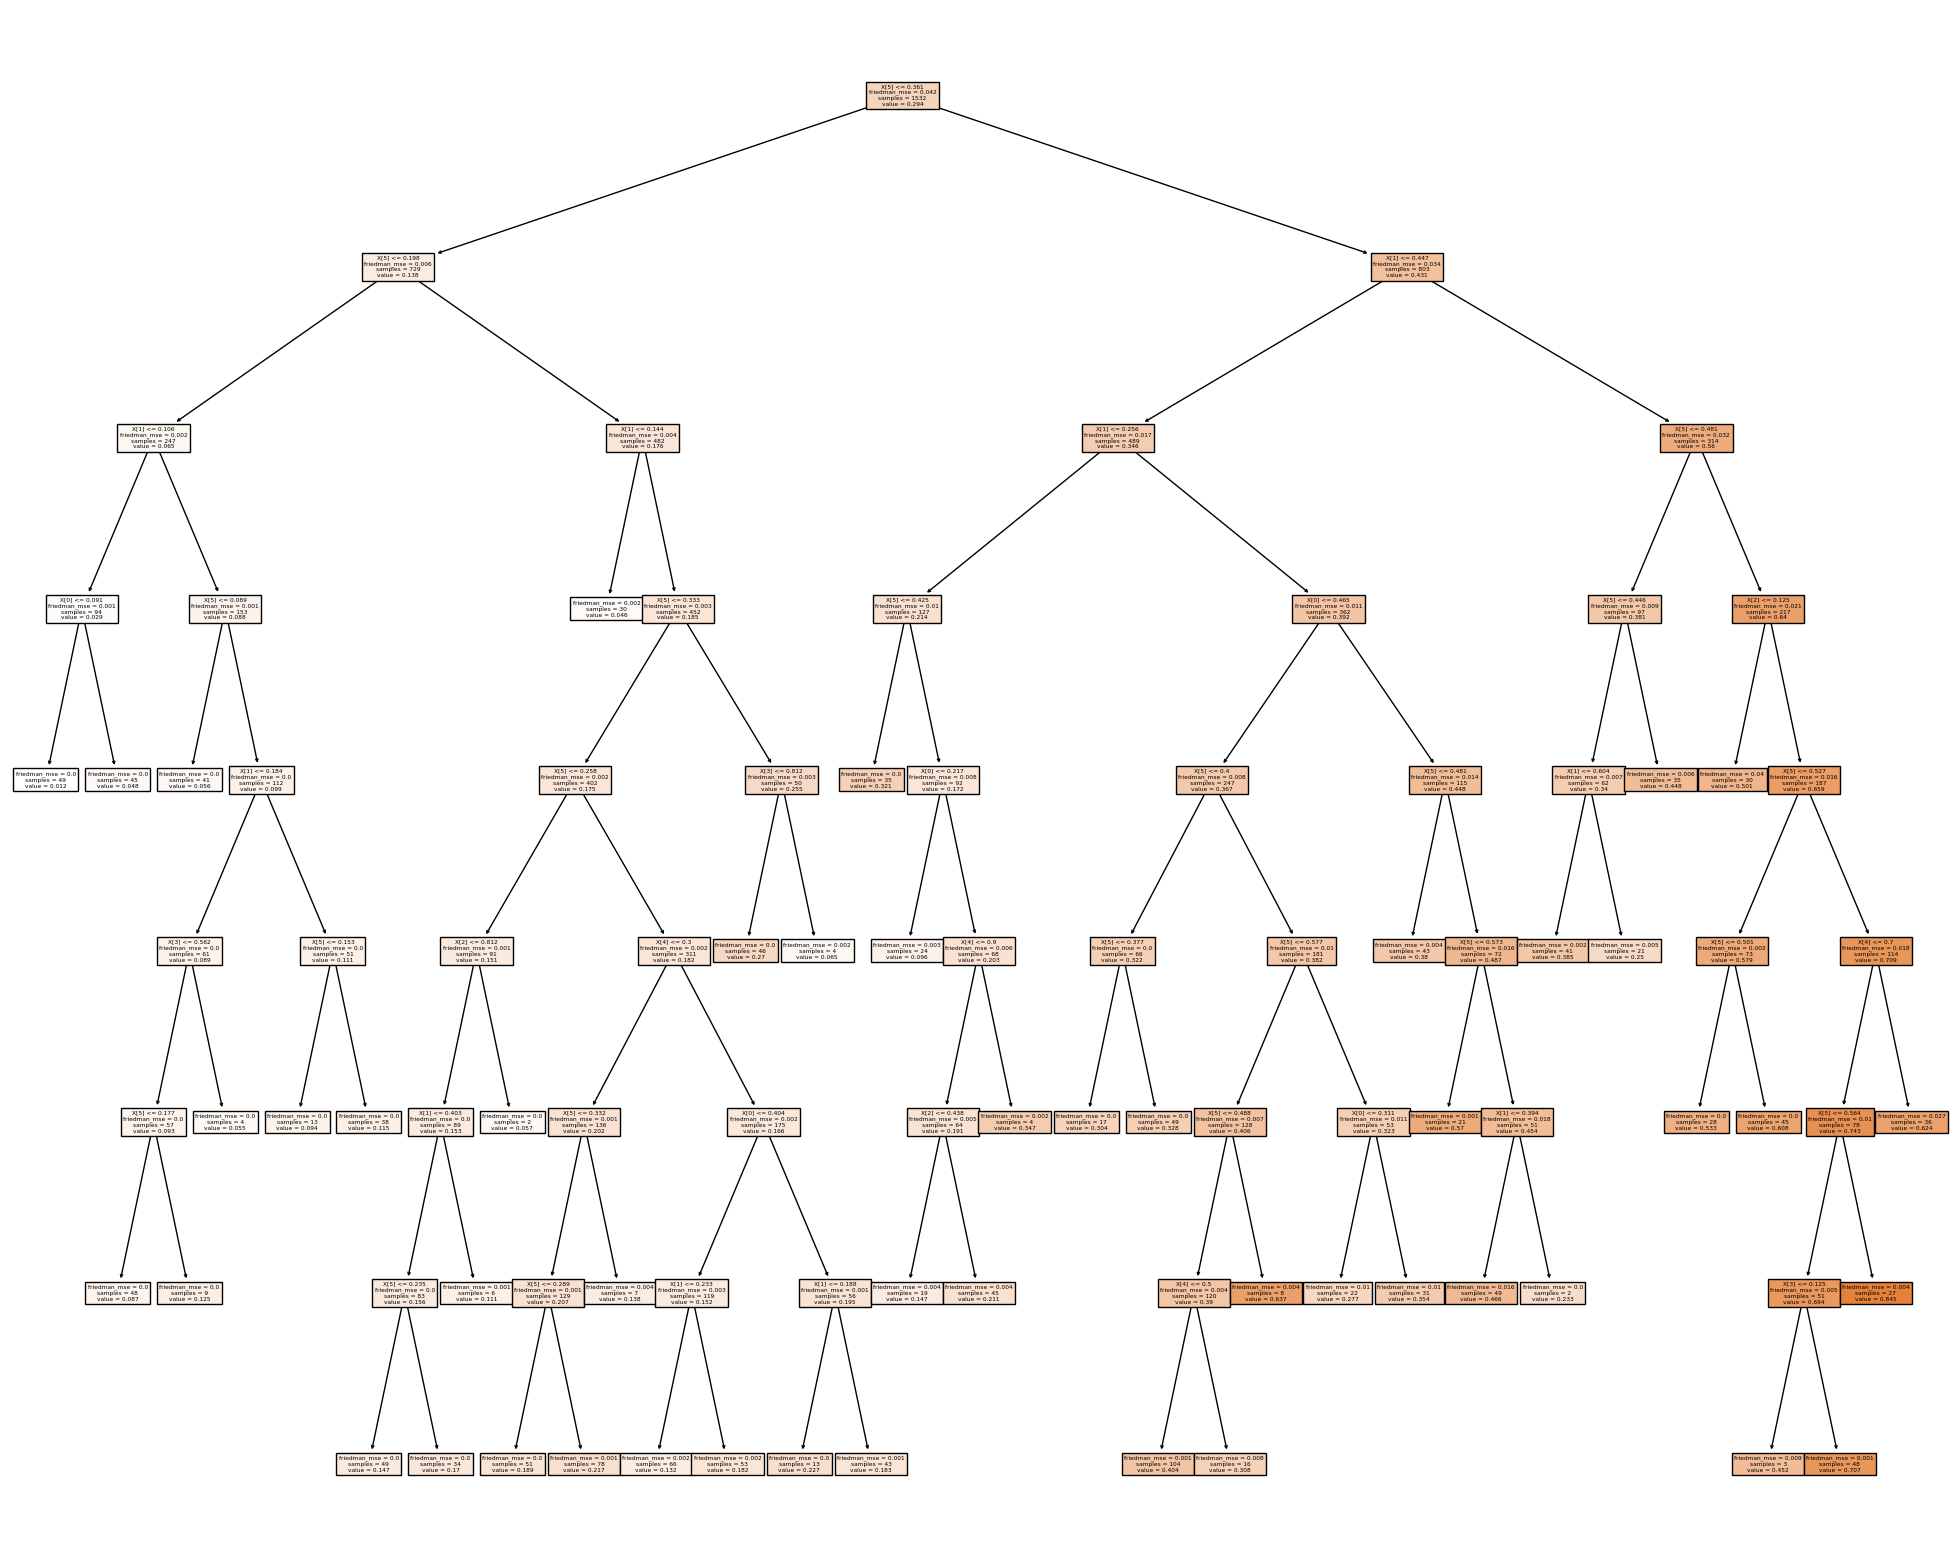

In [37]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(rfr_p.estimators_[1],filled=True)
plt.show()

### Inverse skala Min-Max data

In [38]:
def inverse_MMS(x_test, y_pred_p):
    
    x_ = x_test.reset_index()
    x_ = x_.drop(['index'], axis=1)
    
    x_['predicted'] =  y_pred_p
    x_.insert(0, 'predicted', x_.pop('predicted'))
    
    x_re = scaler.inverse_transform(x_)
    x_re = pd.DataFrame(x_re, columns=[x_.columns])
    
    return x_re

In [39]:
hasil_prediksi = inverse_MMS(x_test, y_pred_p)
hasil_prediksi[:3]

,predicted,buildingSize,landSize,bedRooms,bathRooms,garages,landHeight
0,3.800552e+10,760.0,720.0,4.0,4.0,0.0,2.447962
1,4.467161e+10,1000.0,823.0,4.0,3.0,3.0,2.542796
2,6.516687e+10,400.0,709.0,4.0,4.0,2.0,2.863277


___
## Penerapan (Deployment)

In [40]:
pickle.dump(rfr_p, open('trained_model_kebayoranBaru.sav', 'wb'))

In [41]:
pickle.dump(scaler, open('scale_MMS_kebayoranBaru.pkl', 'wb'))